# **Credit Card Fraud Detection-Over Sampling**
Anonymized credit card transactions labeled as fraudulent or genuine

**Content**

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 73 frauds out of 15936 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.458% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

**Importing Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Importing Dataset**

In [4]:
dataset=pd.read_csv('creditcard.csv')

In [5]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
dataset.shape

(15936, 31)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15936 entries, 0 to 15935
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    15936 non-null  int64  
 1   V1      15936 non-null  float64
 2   V2      15936 non-null  float64
 3   V3      15936 non-null  float64
 4   V4      15936 non-null  float64
 5   V5      15936 non-null  float64
 6   V6      15936 non-null  float64
 7   V7      15936 non-null  float64
 8   V8      15936 non-null  float64
 9   V9      15936 non-null  float64
 10  V10     15936 non-null  float64
 11  V11     15936 non-null  float64
 12  V12     15936 non-null  float64
 13  V13     15936 non-null  float64
 14  V14     15936 non-null  float64
 15  V15     15936 non-null  float64
 16  V16     15936 non-null  float64
 17  V17     15936 non-null  float64
 18  V18     15936 non-null  float64
 19  V19     15936 non-null  float64
 20  V20     15936 non-null  float64
 21  V21     15936 non-null  float64
 22

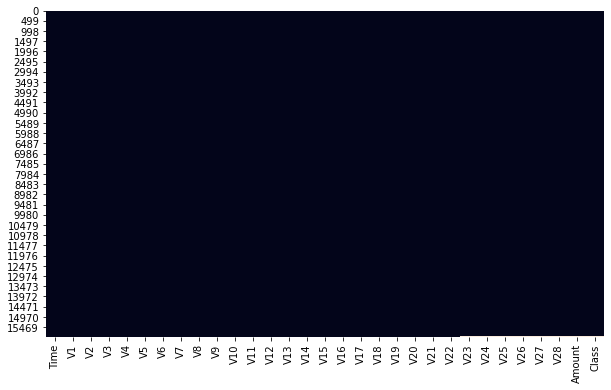

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.isnull(),cbar=False)

In [9]:
feature_nan=[feature for feature in dataset.columns if dataset[feature].isnull().values.any()]
for feature in feature_nan:
  print(feature,dataset[feature].isnull().values.sum())

V23 1
V24 1
V25 1
V26 1
V27 1
V28 1
Amount 1
Class 1


In [10]:
data=dataset.dropna()

In [11]:
y=data['Class']
X=data.drop(['Class'],axis=1)

In [12]:
print(X)

        Time        V1        V2  ...       V27       V28  Amount
0          0 -1.359807 -0.072781  ...  0.133558 -0.021053  149.62
1          0  1.191857  0.266151  ... -0.008983  0.014724    2.69
2          1 -1.358354 -1.340163  ... -0.055353 -0.059752  378.66
3          1 -0.966272 -0.185226  ...  0.062723  0.061458  123.50
4          2 -1.158233  0.877737  ...  0.219422  0.215153   69.99
...      ...       ...       ...  ...       ...       ...     ...
15930  27368 -0.711494  0.785312  ...  0.032099  0.111371    1.29
15931  27369 -1.160116 -0.244177  ... -0.030845 -0.083609   52.90
15932  27369 -3.058318  3.099206  ...  0.171872 -0.236166   99.99
15933  27369 -0.661806  0.315385  ...  0.068546  0.153438   74.58
15934  27370  1.525348 -1.231442  ...  0.058942  0.011087    6.00

[15935 rows x 30 columns]


# **Exploratary Data Analysis**

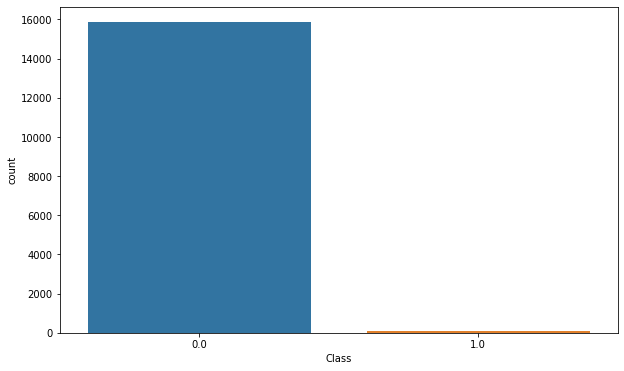

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(dataset['Class'])

In [14]:
dataset.Class.value_counts()

0.0    15862
1.0       73
Name: Class, dtype: int64

**we have total 3972 records total in our dataset among that 3970 are classified as Normal that is 0 and 2 are classified as Fraud that is 1.**

**Hence the ratio between the two classes are 1985:1 and it's huge difference.**

**If we will train our model on this dataset it will be baised towards Normal that is 0 category.**

**Hence it will not be efficient**

**So, we need to perform under Sampling on the dataset**

**Hence, we don't have null value in our dataset**

# **Over Sampling**

In [15]:
from imblearn.combine import SMOTETomek

In [16]:
smk=SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [17]:
print(X_res.shape,y_res.shape)

(31640, 30) (31640,)


In [18]:
#RandomOverSampler to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler

In [19]:
os=RandomOverSampler(ratio=0.5)

In [21]:
X_train_res, y_train_res = os.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [22]:
print(X_train_res.shape, y_train_res.shape)

(23793, 30) (23793,)
